<a href="https://colab.research.google.com/github/saugkim/DeepLearningTrain/blob/main/Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# 05.11.2020 KIM 

In [44]:
# library
import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)


Loading the dataset returns metadata and *training dataset* and *test dataset*.

* The model is trained using `train_dataset`.
* The model is tested against `test_dataset`.

The images are 28 $\times$ 28 arrays, with pixel values in the range `[0, 255]`. 

The *labels* are an array of integers, in the range `[0, 9]`. 

These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>



In [60]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train, test = dataset['train'], dataset['test']

class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

num_train = metadata.splits['train'].num_examples
num_test = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train))
print("Number of test examples:     {}".format(num_test))

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map applies the normalize function to each element in the train and test datasets
train_dataset =  train.map(normalize)
test_dataset  =  test.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteABJG8A/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteABJG8A/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Number of training examples: 60000
Number of test examples:     10000


In [47]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

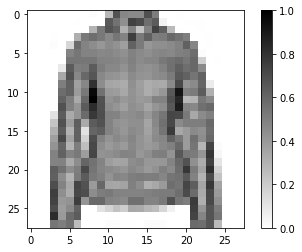

In [7]:
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

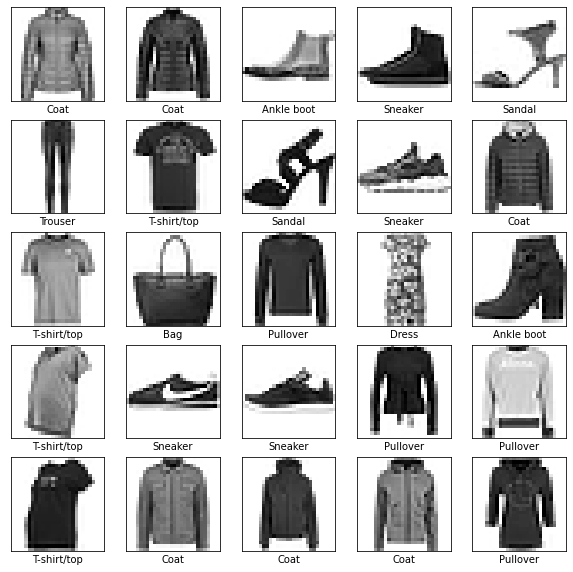

In [8]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(test_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

## Simple NN Model

In [48]:
BATCH_SIZE = 32
train_set = train_dataset.repeat().shuffle(num_train).batch(BATCH_SIZE)
test_set = test_dataset.batch(BATCH_SIZE)

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,1)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)                                 
])
optimizer = keras.optimizers.Adam()

model.compile(loss = keras.losses.SparseCategoricalCrossentropy(),
              optimizer = optimizer,
              metrics = ['accuracy'])

history = model.fit(train_set,
                    epochs = 5,
                    steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5013 - accuracy: 0.8241
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3765 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3361 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8836
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2911 - accuracy: 0.8926


In [51]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(num_test/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 5ms/step - loss: 0.3427 - accuracy: 0.8774
Accuracy on test dataset: 0.8773999810218811


(32, 10)
4 4


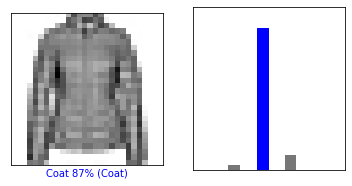

In [50]:
for test_images, test_labels in test_set.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

print(predictions.shape)

print(np.argmax(predictions[0]), test_labels[0])

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

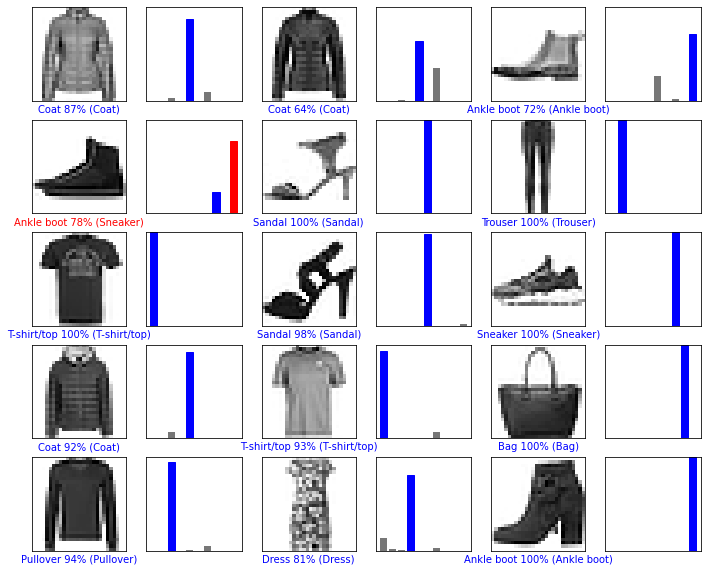

In [52]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [53]:
img = test_images[0]
print(img.shape)

# Add the image to a batch where it's the only member.
img = np.array([img])
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])

(28, 28, 1)
(1, 28, 28, 1)


## CNN

In [59]:
keras.backend.clear_session()

import numpy as np
import math
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [60]:
BATCH_SIZE = 32
train_set = train_dataset.repeat().shuffle(num_train).batch(BATCH_SIZE)
test_set = test_dataset.batch(BATCH_SIZE)

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_set, epochs=10, steps_per_epoch=math.ceil(num_train/BATCH_SIZE))

In [64]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(num_test/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3098 - accuracy: 0.9174
Accuracy on test dataset: 0.9174000024795532


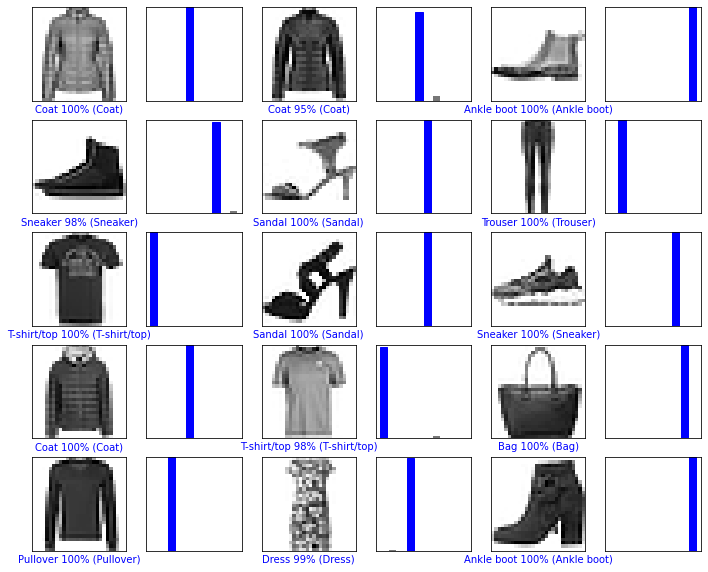

In [65]:
for test_images, test_labels in test_set.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


## ImageDataGenerator

In [69]:
keras.backend.clear_session()

import tensorflow as tf
keras = tf.keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt
import numpy as np

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [71]:
# Downloading raw data

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

68608000/68606236 [==============================] - 1s 0us/step
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [72]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures


num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [73]:
# Data processing

BATCH_SIZE = 100  
IMG_SHAPE  = 150 

image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our data

train_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                    class_mode='binary')

val_data_gen = image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=validation_dir,
                                                  shuffle=False,
                                                  target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                  class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


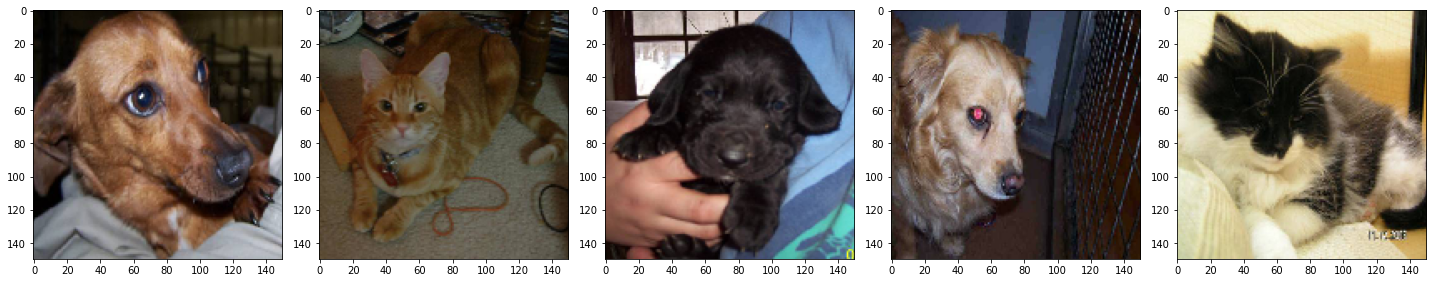

In [75]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


sample_training_images, _ = next(train_data_gen) 

plotImages(sample_training_images[:5]) 

In [77]:
# Model 

model = keras.models.Sequential([
                                 
    keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(150,150,3)),
    keras.layers.MaxPooling2D((2,2), strides=1),

    keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2,2), strides=1),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2), strides=1),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 149, 149, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 146, 146, 128)     73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 145, 145, 128)     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 143, 143, 128)    

In [80]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Epoch 1/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 23s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 3/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 5/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 6/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 22s 1s/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 8/100
2

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(EPOCHS)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label="Traning accuracy")
plt.plot(epoch_range, val_accuracy, label ="Validation accuracy")
plt.legend("lower right")
plt.title("Training and validation accuracy")

plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label="Traning loss")
plt.plot(epoch_range, val_loss, label ="Validation loss")
plt.legend("upper right")
plt.title("Training and validation loss")

plt.show()


## Image Classification With Image Augmentation

In [ ]:
image_gen_train = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

In [ ]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(EPOCHS)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(epoch_range, accuracy, label="Traning accuracy")
plt.plot(epoch_range, val_accuracy, label ="Validation accuracy")
plt.legend("lower right")
plt.title("Training and validation accuracy")

plt.figure(figsize=(10,6))
plt.subplot(1,2,2)
plt.plot(epoch_range, loss, label="Traning loss")
plt.plot(epoch_range, val_loss, label ="Validation loss")
plt.legend("upper right")
plt.title("Training and validation loss")

plt.show()


## Tensorflow Hub MobileNet

In [42]:
keras.backend.clear_session()

import tensorflow as tf
keras = tf.keras

import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import numpy as np
import PIL.Image as Image

In [43]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMAGE_RES = 224

model = keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))
])

In [46]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize((IMAGE_RES, IMAGE_RES))
grace_hopper 

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())


(224, 224, 3)
(1, 1001)
653


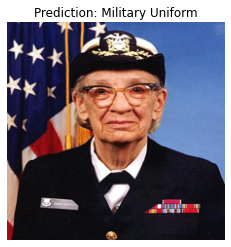

In [47]:
grace_hopper = np.array(grace_hopper)/255.0
print(grace_hopper.shape)

result = model.predict(grace_hopper[np.newaxis, ...])
print(result.shape)

predicted_class = np.argmax(result[0], axis=-1)
print(predicted_class)


plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [48]:
(train_examples, validation_examples), info = tfds.load(
            'cats_vs_dogs', 
            with_info=True, 
            as_supervised=True, 
            split=['train[:80%]', 'train[80%:]'],
)

num_examples = info.splits['train'].num_examples
num_classes = info.features['label'].num_classes

Image 1 shape: (262, 350, 3)
tf.Tensor(1, shape=(), dtype=int64)


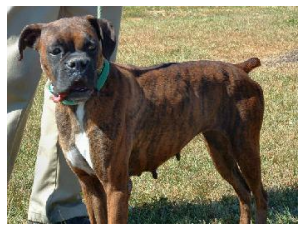

Image 2 shape: (409, 336, 3)
tf.Tensor(1, shape=(), dtype=int64)


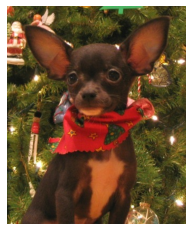

Image 3 shape: (493, 500, 3)
tf.Tensor(1, shape=(), dtype=int64)


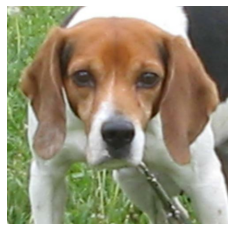

In [49]:
for i, example_image in enumerate(train_examples.take(3)):
  print("Image {} shape: {}".format(i+1, example_image[0].shape))
  print(example_image[1])
  plt.imshow(example_image[0])
  plt.axis('off')
  plt.show()

In [50]:
def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches      = train_examples.shuffle(num_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [29]:
image_batch, label_batch = next(iter(train_batches.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

result_batch = model.predict(image_batch)

predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['Rottweiler', 'Egyptian cat', 'schipperke', 'Labrador retriever',
       'Persian cat', 'Labrador retriever', 'Labrador retriever',
       'Egyptian cat', 'Leonberg', 'Egyptian cat', 'tabby', 'dingo',
       'tabby', 'Shetland sheepdog', 'Border terrier', 'Siamese cat',
       'tiger cat', 'tabby', 'Great Dane', 'tabby', 'standard schnauzer',
       'Sussex spaniel', 'Egyptian cat', 'tiger cat', 'English setter',
       'Doberman', 'Border collie', 'Ibizan hound', 'bluetick',
       'dalmatian', 'hamper', 'Labrador retriever'], dtype='<U30')

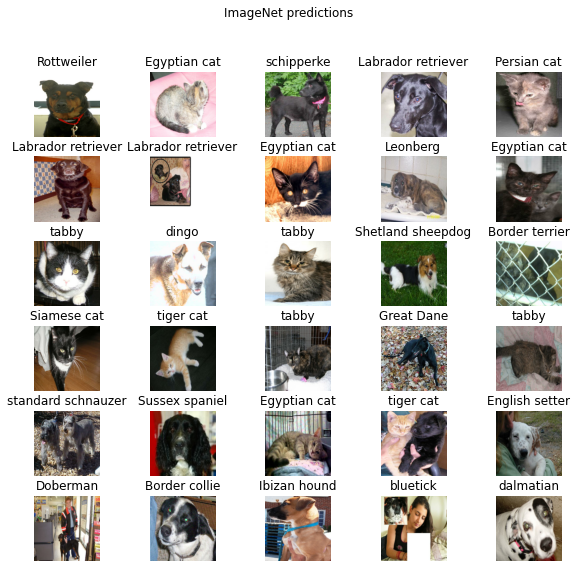

In [30]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

### Transfer Learning with Tensorflow Hub

In [51]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES,3))

In [54]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

feature_extractor.trainable = False

model = tf.keras.Sequential([
  feature_extractor,
  layers.Dense(2)
])

model.summary()

(32, 1280)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [55]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
EPOCHS = 6
history = model.fit(train_batches, epochs = EPOCHS,
                    validation_data = validation_batches)

Epoch 1/6
582/582 [==============================] - 37s 63ms/step - loss: 0.0569 - accuracy: 0.9818 - val_loss: 0.0326 - val_accuracy: 0.9890
Epoch 2/6
582/582 [==============================] - 36s 62ms/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.0317 - val_accuracy: 0.9908
Epoch 3/6
582/582 [==============================] - 36s 61ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0319 - val_accuracy: 0.9901
Epoch 4/6
582/582 [==============================] - 35s 61ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0314 - val_accuracy: 0.9908
Epoch 5/6
582/582 [==============================] - 35s 60ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0331 - val_accuracy: 0.9899
Epoch 6/6
582/582 [==============================] - 35s 60ms/step - loss: 0.0179 - accuracy: 0.9933 - val_loss: 0.0328 - val_accuracy: 0.9895


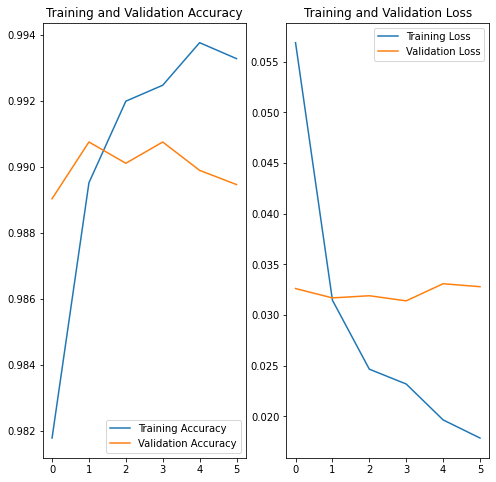

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [59]:
# Evaluation

class_names = np.array(info.features['label'].names)
print(class_names)

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

['cat' 'dog']


array(['dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog',
       'cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'cat',
       'dog', 'cat', 'dog', 'dog', 'cat', 'cat', 'dog', 'dog', 'dog',
       'dog', 'dog', 'dog', 'cat', 'dog'], dtype='<U3')

Labels:  [1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1]
Predicted labels:  [1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1]


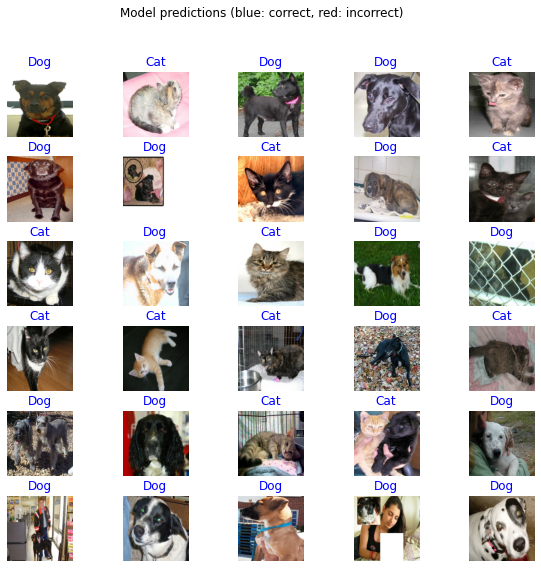

In [58]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")